# Data Modeling
Zuerst vorbereitete Daten einlesen

In [106]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn import tree

cleaned_data = pd.read_csv('cleaned_data.csv')

### Robert 
--Predict the category of crime that occurred given a certain time and location

#### Location aufteilen in Dummy Varibalen 


In [2]:
# Spalte LOCATION wird zu mehrere 0,1 Variablen um diese im Suchbaum abzubilden 

# One-Hot Encoding für das String-Feature "LOCATION"
area_names = list(map(lambda x: 'AREA.NAME_' + x, set(cleaned_data['AREA.NAME'].values)))
encoded_data = pd.get_dummies(cleaned_data, columns=['AREA.NAME'])
cleaned_data = pd.concat([encoded_data], axis=1)
# Anzeigen des transformierten DataFrames
print(area_names)
cleaned_data['RD'] = cleaned_data['RD'].astype(str)

# Definiere eine Funktion, um die letzten beiden Zeichen einer Zeichenkette zu entfernen
def remove_last_two_chars(text):
    return text[:-1]

# Wende die Funktion auf die Spalte "RD" an und speichere das Ergebnis in einer neuen Spalte "New_RD"
cleaned_data['New_RD'] = cleaned_data['RD'].apply(remove_last_two_chars)
cleaned_data['New_RD'] = cleaned_data['New_RD'].astype(int)
# Gib den aktualisierten DataFrame aus
cleaned_data


cleaned_data['New_RD'] = cleaned_data['New_RD'].astype(str)
rd_nr = list(map(lambda x: 'New_RD_' + x, set(cleaned_data['New_RD'].values)))
encoded_data = pd.get_dummies(cleaned_data, columns=['New_RD'])
cleaned_data = pd.concat([encoded_data], axis=1)
print(rd_nr)

# Gib den aktualisierten DataFrame aus
cleaned_data


['AREA.NAME_Newton', 'AREA.NAME_Mission', 'AREA.NAME_Van Nuys', 'AREA.NAME_Harbor', 'AREA.NAME_Central', 'AREA.NAME_Olympic', 'AREA.NAME_West Valley', 'AREA.NAME_Southeast', 'AREA.NAME_Northeast', 'AREA.NAME_Southwest', 'AREA.NAME_Pacific', 'AREA.NAME_N Hollywood', 'AREA.NAME_Devonshire', 'AREA.NAME_Rampart', 'AREA.NAME_Topanga', 'AREA.NAME_Wilshire', 'AREA.NAME_Hollywood', 'AREA.NAME_Hollenbeck', 'AREA.NAME_77th Street', 'AREA.NAME_Foothill', 'AREA.NAME_West LA']
['New_RD_49', 'New_RD_58', 'New_RD_151', 'New_RD_202', 'New_RD_138', 'New_RD_114', 'New_RD_43', 'New_RD_55', 'New_RD_101', 'New_RD_13', 'New_RD_25', 'New_RD_161', 'New_RD_22', 'New_RD_106', 'New_RD_121', 'New_RD_166', 'New_RD_46', 'New_RD_88', 'New_RD_146', 'New_RD_37', 'New_RD_176', 'New_RD_175', 'New_RD_73', 'New_RD_143', 'New_RD_208', 'New_RD_158', 'New_RD_174', 'New_RD_79', 'New_RD_103', 'New_RD_27', 'New_RD_152', 'New_RD_26', 'New_RD_214', 'New_RD_18', 'New_RD_144', 'New_RD_104', 'New_RD_91', 'New_RD_42', 'New_RD_134', '

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,...,New_RD_90,New_RD_91,New_RD_92,New_RD_93,New_RD_94,New_RD_95,New_RD_96,New_RD_97,New_RD_98,New_RD_99
0,2013-03-20,132007717.0,2013-03-20,20:15:00,20,2004,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,2013-03-10,130608787.0,2013-03-10,04:45:00,6,635,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,2013-12-18,131820260.0,2013-12-18,07:45:00,18,1839,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
3,2013-10-18,131817514.0,2013-10-18,17:30:00,18,1827,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-26,130510483.0,2013-05-25,20:00:00,5,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215684,2016-12-27,121925197.0,2016-12-27,19:55:00,19,1981,997,TRAFFIC DR #,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1215685,2016-12-13,141323386.0,2016-12-13,22:15:00,13,1352,624,BATTERY - SIMPLE ASSAULT,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1215686,2016-12-30,122120521.0,2016-12-30,19:50:00,21,2143,624,BATTERY - SIMPLE ASSAULT,AA,Adult Arrest,...,0,0,0,0,0,0,0,0,0,0
1215687,2016-12-14,121430255.0,2016-12-14,21:55:00,14,1413,997,TRAFFIC DR #,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


In [107]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame mit den Spalten "RD" und "LAT" erstellt.
# Du kannst deine Daten in den DataFrame "df" laden.

# Definiere die benutzerdefinierte Aggregationsfunktion, um den Mittelwert von "LAT" und den entsprechenden Wert von "RD" zu erhalten

# Konvertiere die Spalte "RD" in einen String-Datentyp
#cleaned_data['RD'] = cleaned_data['RD'].astype(str)

# Definiere eine Funktion, um die letzten beiden Zeichen einer Zeichenkette zu entfernen
#def remove_last_two_chars(text):
 #   return text[:-0]

# Wende die Funktion auf die Spalte "RD" an und speichere das Ergebnis in einer neuen Spalte "New_RD"
#cleaned_data['RD'] = cleaned_data['RD'].apply(remove_last_two_chars)


def custom_agg(series):
    return pd.Series({
        'LAT_mean': series['LAT'].mean(),
        'LONG_mean': series['LONG'].mean(),
        'RD_value': series.iloc[0]
    })

# Gruppiere den DataFrame nach der Spalte "RD" und wende die benutzerdefinierte Aggregationsfunktion an
result = cleaned_data.groupby('RD')['LAT', 'LONG'].apply(custom_agg).reset_index()

# Gib das Ergebnis aus
print(result)

C:\Users\Robert.Janus.OFFICE\AppData\Local\Temp\ipykernel_21768\2138101987.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = cleaned_data.groupby('RD')['LAT', 'LONG'].apply(custom_agg).reset_index()


        RD   LAT_mean   LONG_mean  \
0      100  34.041261 -118.251708   
1      101  34.067251 -118.249099   
2      105  34.070593 -118.232127   
3      109  34.051274 -118.248807   
4      111  34.060724 -118.241777   
...    ...        ...         ...   
1298  2187  34.165324 -118.595587   
1299  2189  34.167683 -118.574712   
1300  2196  34.151759 -118.594931   
1301  2197  34.155573 -118.572046   
1302  2198  34.147267 -118.599886   

                                               RD_value  
0     LAT      34.0384
LONG   -118.2571
Name: 55168,...  
1     LAT      34.0724
LONG   -118.2486
Name: 479, d...  
2     LAT      34.0710
LONG   -118.2302
Name: 475, d...  
3     LAT      34.0761
LONG   -118.2308
Name: 4193, ...  
4     LAT      34.0617
LONG   -118.2469
Name: 6, dty...  
...                                                 ...  
1298  LAT      34.1613
LONG   -118.6022
Name: 911, d...  
1299  LAT      34.1706
LONG   -118.5698
Name: 18, dt...  
1300  LAT      34.1575
LONG   -11

In [108]:
result.to_csv('ergebnis.csv', index=False)

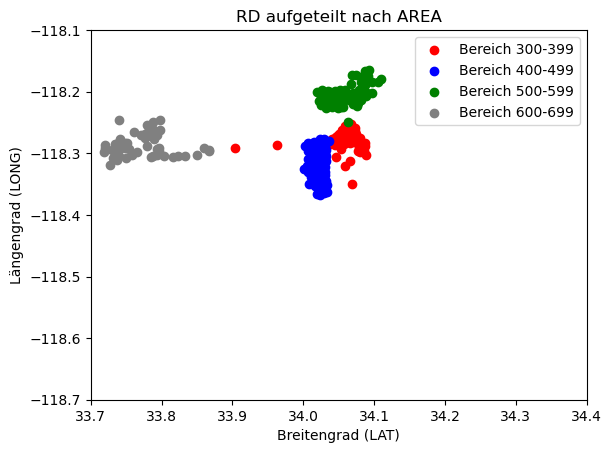

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei in einen DataFrame
df = pd.read_csv('ergebnis.csv')

# Wähle die gewünschten Spalten aus
df_filtered1 = df[df['RD'].between(200, 299)]
df_filtered2 = df[df['RD'].between(300, 399)]
df_filtered3 = df[df['RD'].between(400, 499)]
df_filtered4 = df[df['RD'].between(500, 599)]

spalte1_1 = df_filtered1['LAT_mean']
spalte2_1 = df_filtered1['LONG_mean']
spalte1_2 = df_filtered2['LAT_mean']
spalte2_2 = df_filtered2['LONG_mean']
spalte1_3 = df_filtered3['LAT_mean']
spalte2_3 = df_filtered3['LONG_mean']
spalte1_4 = df_filtered4['LAT_mean']
spalte2_4 = df_filtered4['LONG_mean']
# Erstelle das Punktdiagramm

plt.scatter(spalte1_1, spalte2_1, c='red', label='Bereich 300-399')
plt.scatter(spalte1_2, spalte2_2, c='blue', label='Bereich 400-499')
plt.scatter(spalte1_3, spalte2_3, c='green', label='Bereich 500-599')
plt.scatter(spalte1_4, spalte2_4, c='grey', label='Bereich 600-699')

plt.ylabel('Längengrad (LONG)')
plt.xlabel('Breitengrad (LAT)')
plt.title('RD aufgeteilt nach AREA')
plt.legend()

# Setze die Range der x- und y-Achse auf feste Werte
x_range = (33.7, 34.4 )
y_range = (-118.7, -118.1)
plt.xlim(x_range)
plt.ylim(y_range)
plt.show()

modelle
xgboost
multilayerperception

#### DecisionTree 1/4
- features = ['UNIX.TIMESTAMP','LAT','LONG', 'RD'] + area_names
- target = 'CRIME_CAT'

In [7]:
dec_tree = tree.DecisionTreeClassifier()
features = ['UNIX.TIMESTAMP','LAT','LONG', 'RD'] + area_names
target = 'CRIME_CAT'

selection = features + [target]

predict_data = cleaned_data[selection].copy()

X_train, X_test, y_train, y_test = train_test_split(predict_data.drop(target, axis=1), predict_data[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.26021025096858574

#### DecisionTree 2/4
- features = ['RD']
- target = 'CRIME_VIOLENT'

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = ['RD']
target = 'CRIME_VIOLENT'

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)



# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 80)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

#hier funktionier features = [ 'RD'] + area_names besser als rd_nr

Genauigkeit des Modells: 0.7420065970765574


#### DecisionTree 4/4
- features = [ 'RD',  'LAT', 'LONG']
- target = 'CRIME_CAT'


In [47]:
predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = [ 'RD',  'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# # Schritt 4: LabelEncoder auf 'AREA' anwenden
# label_encoder_area = LabelEncoder()
# X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
# X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 100)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.30265939507604733


#### DecisionForest 1/3
- features = ['AREA', 'RD', 'LAT', 'LONG']
- target = 'CRIME_CAT'

Bisher bestes Ergebnis!

In [117]:
#Forrest

predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
features = ['RD', 'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: Modell erstellen und trainieren
deep = 1
n_est = 1
for i in range(20, 30, 2):
    for j in range(54, 68, 2):
        model = RandomForestClassifier(max_depth = i, n_estimators=j)
        model.fit(X_train, y_train)

        # Schritt 5: Vorhersagen treffen
        y_pred = model.predict(X_test)

        # Schritt 6: Modell evaluieren
        accuracy = accuracy_score(y_test, y_pred)
        print("Genauigkeit des Modells: deep: " + str(i) + "n_est: " +str(j) , accuracy)


Genauigkeit des Modells: deep: 20n_est: 54 0.31274831577129036
Genauigkeit des Modells: deep: 20n_est: 56 0.31306912123978975
Genauigkeit des Modells: deep: 20n_est: 58 0.3126454935057457
Genauigkeit des Modells: deep: 20n_est: 60 0.31311025014600763
Genauigkeit des Modells: deep: 20n_est: 62 0.3128634767087004
Genauigkeit des Modells: deep: 20n_est: 64 0.31270307397445074
Genauigkeit des Modells: deep: 20n_est: 66 0.31291283139616183
Genauigkeit des Modells: deep: 22n_est: 54 0.3143934720200051
Genauigkeit des Modells: deep: 22n_est: 56 0.31480887397280555
Genauigkeit des Modells: deep: 22n_est: 58 0.31494048647270273
Genauigkeit des Modells: deep: 22n_est: 60 0.3147348419416134
Genauigkeit des Modells: deep: 22n_est: 62 0.3149898411601642
Genauigkeit des Modells: deep: 22n_est: 64 0.3153887915504775
Genauigkeit des Modells: deep: 22n_est: 66 0.3147348419416134
Genauigkeit des Modells: deep: 24n_est: 54 0.31398218295782643
Genauigkeit des Modells: deep: 24n_est: 56 0.3138587962391728


#### RandomForest
- features = ['RD', 'LAT', 'LONG']#, 'TIME.OCC_hour_cos']
- target = 'Crm.Cd'

In [52]:
#Forrest

predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
features = ['RD', 'LAT', 'LONG', 'TIME.OCC_hour_cos']
target = 'Crm.Cd'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren

model = RandomForestClassifier(max_depth = 150, n_estimators=50)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells deep: " , accuracy)

Genauigkeit des Modells deep:  0.23951829825037632


#### DecisionForest 3/3
- Target: Crm.Cd
- Features: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS

####  sequentielles neuronales Netzwerk verwendet.
- Dense-Schicht
- target = 'CRIME_CAT'
- features = 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL FEATURES
- viel Ausprobiert - wenig gutes. 

####  sequentielles neuronales Netzwerk verwendet.
- Dense-Schicht

In [85]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Schritt 1: Daten laden und vorverarbeiten
predict_data = cleaned_data.copy()
target = 'Crm.Cd'

features = ['RD', 'LONG', 'LAT', 'TIME.OCC_hour_cos']
# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


# Schritt 2: Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)



# Schritt 5: Neuronales Netzwerk erstellen

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='tanh'))


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=2, batch_size=20, validation_split=0.2)

# Schritt 7: Vorhersagen treffen
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Schritt 8: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells: " + str(accuracy))

#höher als 42,98 ist nicht möglich. Habe activation = "tanh" und "relu" ausprobiert, 2 und 3 Layers und 32, 64 und 128 Neuronen. 1, 2, 10 Epochs und batchsize = 2, 10, 20 
#"mean_squared_error" funktioniert garnicht
#optimizer='adam' gut, optimizer='SGD' gut,  optimizer='Adagrad' gut
# okay. iwas ist komisch. mit 3 mal 2 Neuronen bekomme ich trd über 42%. Das ist komisch. - erklärbar: einteilung bei den Koordinaten macht, dass wir auf 42% kommen 



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

#### Naive Bayes-Klassifikator (GaussianNB)
- Target: CRIME_CAT
- Features: ['UNIX.TIMESTAMP','AREA.NAME','LAT','LONG']
- viel Ausprobiert - wenig gutes

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB


predict_data = cleaned_data.copy()
# Build a Gaussian Classifier
nb_class = GaussianNB()
# Prior-Verteilungen für jede Klasse definieren

features = ['UNIX.TIMESTAMP','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
# Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
predict_data = predict_data[predict_data['LONG'].notnull()]


X_train, X_test, y_train, y_test = train_test_split(predict_data.drop(target, axis=1), predict_data[target], test_size=0.2, random_state=42)
nb_class.fit(X_train,y_train)

print("Model Accuracy:")
nb_class.score(X_test,y_test)
#ohne Priors: 42,811
#probiert Priors anzupassen. Komme auf Maximal 21% WK. lohnt nicht
#priors = [0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0565] - 8,9%

#Auch weitere Anpassungen brachten keine Verbesserung:
#print("Accuracy (Standardized):", accuracy_standardized)
#print("Accuracy (Normalized):", accuracy_normalized)

Model Accuracy:


0.41406762757950544

#### LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
target = 'CRIME_CAT'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos'
features = predict_data.drop([target] + column_to_exclude, axis=1).columns

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: Logistische Regression initialisieren und trainieren
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren (optional)
accuracy = model.score(X_test, y_test)
print("Genauigkeitswert des Modells: " + str(accuracy))


#Genauigkeitswert des Modells: 0.41406762757950544

Genauigkeitswert des Modells: 0.4164798540730828


#### k-NN

In [81]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predict_data = cleaned_data.copy()

target = 'Crm.Cd'

features = ['RD', 'LONG', 'LAT', 'TIME.OCC_hour_cos']


# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


################

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# Schritt 2: Daten normalisieren
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection
selector = SelectKBest(k=3)  # Wähle die 10 besten Merkmale
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Schritt 4: Parameter Grid für die Grid Search festlegen
param_grid = {
    'n_neighbors': [15],
    'weights': ['distance'],
    'metric': ['manhattan']
}


# Schritt 5: Grid Search durchführen
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Schritt 6: Beste Parameter und Genauigkeit ausgeben
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Parameter: ", best_params)
print("Genauigkeit: ", best_accuracy)

# Schritt 7: Vorhersagen treffen und Genauigkeit auf Testdaten berechnen
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit auf Testdaten: ", accuracy)

#Genauigkeit mit k = 5 und keine weiteren anpassungen: Genauigkeit des k-NN-Modells (k=5): 0.36051278991467706

#######
# ['RD', 'LONG', 'LAT',
#Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
#Genauigkeit:  0.20129741286336844
#Genauigkeit auf Testdaten:  0.20492888812114932

 #['RD', 'LONG', 'LAT',
#Parameter:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
#Genauigkeit:  0.2084188904571302
#Genauigkeit auf Testdaten:  0.211262739678701

# ['RD', 'LONG', 'LAT', 'TIME.OCC_hour_cos']
#Parameter:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
#Genauigkeit:  0.2041867226325723
#Genauigkeit auf Testdaten:  0.21273104163067888

#Parameter:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
#Genauigkeit:  0.20759014324317202
#Genauigkeit auf Testdaten:  0.21584861272199327

#Parameter:  {'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'distance'}
#Genauigkeit:  0.22118223326671585
#Genauigkeit auf Testdaten:  0.22800631739999505

#Parameter:  {'metric': 'manhattan', 'n_neighbors': 150, 'weights': 'distance'}
#Genauigkeit:  0.22325924510292322
#Genauigkeit auf Testdaten:  0.22984889239855555



c:\Users\Robert.Janus.OFFICE\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Parameter:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Genauigkeit:  0.20348238944223893
Genauigkeit auf Testdaten:  0.21095427288206697


In [11]:
from sklearn import tree
import pydotplus

#class_names = [str(c) for c in model.classes_]

# Exportieren des ersten Entscheidungsbaums aus dem Random Forest-Modell
#estimator = model.estimators_[0]

# Erstellen des Dot-Datenstrings
#dot_data = tree.export_graphviz(estimator, out_file=None, feature_names=features, class_names=class_names, filled=True, rounded=True, special_characters=True)

# Erzeugen des Graphobjekts aus dem Dot-Datenstring
#graph = pydotplus.graph_from_dot_data(dot_data)

# Speichern des Entscheidungsbaums als PNG-Bild
#graph.write_png("randomForest.png")

# Speichern des Entscheidungsbaums als PDF
#graph.write_pdf("randomForest.pdf")
